This notebook looks at the influence function of the logarithm of the score matching density estimate 
in a kernel exponential family $\mathcal{Q}$ evaluated at a point $w$, which is approximated by 

$$
\frac{1}{\varepsilon} \Big(\log q \big(w; (1 - \varepsilon) F_n + \varepsilon \delta_y\big) - \log q \big(w; F_n\big)\Big), \quad \text{ for all } w \in \mathcal{X}, \hspace{50pt} (*)
$$

where $\mathcal{X} \subseteq \mathbb{R}$ is the sample space, $q (\cdot; F): \mathcal{X} \to [0, \infty)$ is the score matching density estimate in $\mathcal{Q}$ under the probability distribution $F$, $F_n$ is the empirial distribution, $\varepsilon \in (0, 1]$, and $\delta_y$ is the point mass 1 at $y \in \mathcal{X}$. 

In the below, we use the `waiting` variable in the Old Faithful Geyser dataset and insert an additional observation, i.e., $y$ in $(*)$ each time. These additional observations are $90$, $92$, $\cdots$, $398$, $400$. Here, we choose the sample space $\mathcal{X} = (0, \infty)$, the kernel function to be the Gaussian kernel function, the bandwidth parameter to be $5.0$, $7.0$ and $9.0$, the penalty parameter to be $\exp({-12.0})$, $\exp({-10.0})$ and $\exp({-8.0})$, and $\varepsilon$ in $(*)$ to be `1e-8`. 

In [41]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline

In [8]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFdensity')

kernel_type = 'gaussian_poly2'
bw_list = [5.0, 7.0, 9.0]
log_pen_param_list = [-12.0, -10.0, -8.0]
contam_weight = 1e-8

## Influence Function at Various Points in $\mathcal{X}$

We first look at the heatmap of the values of the resulting influence function $(*)$ evaluated at various points as we move the additional observation. 

In [35]:
# for bw, log_pen_param in zip(bw_listm, log_pen_param_list): 
bw = bw_list[0]
log_pen_param = log_pen_param_list[0]
save_dir=f'data/bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}'

horaxis_contamdata = np.load(save_dir + f'/contam_data.npy').flatten()
veraxis_newdata = np.load(save_dir + f'/new_data.npy').flatten()

plot_vals = pd.DataFrame()
for i in range(len(horaxis_contamdata)): 
    plot_vals = pd.concat([
        plot_vals, 
        pd.DataFrame(
            {'contam_data': [horaxis_contamdata[i]] * len(veraxis_newdata),
             'waiting': veraxis_newdata, 
             'IF_vals': np.load(save_dir + f'/contam_data={contam_data_array[i]}-IF-logden-newdata.npy')})], 
        axis = 0)

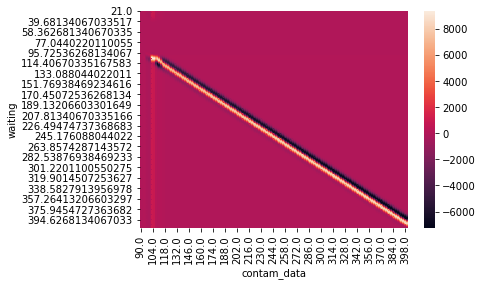

In [37]:
plot_pivot_table = plot_vals.pivot('contam_data', 'waiting', 'IF_vals')
sns.heatmap(plot_pivot_table.T)
plt.show()